# Assignment 4 
Due: Friday, 11 Nov, 2022 at 11:59PM


In [305]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [306]:
# Question 1 (25 Points)
"""

# https://www.boxofficemojo.com/release/rl3059975681/?ref_=bo_tt_gr_1
# You will use above link to get data for this assignment, using web scraping in python methods we went in class,

1: Get the title and description of the movie from webpage into information dictionary varible, 
         and print information dictionary
2: Get infromation about Grosses into Grosses dictionary varible in python, and print the dictionary
3: Get the summary information from page into summary dictionary variable, this is on the side of Grosses, 
         values are Distributer, Opening,......,In Release, Wildest Release
4: Get table Domestic Daily and convert to pandas dataframe and print that dataframe
5: Create at least 3 charts/visualization using dataframe you created above and breifly explain them 
         using comments in your notebook submission. Make sure you clean your data before applying for charts.

"""

'\n\n# https://www.boxofficemojo.com/release/rl3059975681/?ref_=bo_tt_gr_1\n# You will use above link to get data for this assignment, using web scraping in python methods we went in class,\n\n1: Get the title and description of the movie from webpage into information dictionary varible, \n         and print information dictionary\n2: Get infromation about Grosses into Grosses dictionary varible in python, and print the dictionary\n3: Get the summary information from page into summary dictionary variable, this is on the side of Grosses, \n         values are Distributer, Opening,......,In Release, Wildest Release\n4: Get table Domestic Daily and convert to pandas dataframe and print that dataframe\n5: Create at least 3 charts/visualization using dataframe you created above and breifly explain them \n         using comments in your notebook submission. Make sure you clean your data before applying for charts.\n\n'

In [307]:
url = "https://www.boxofficemojo.com/release/rl3059975681/?ref_=bo_tt_gr_1"
reqs = requests.get(url)
soup = BeautifulSoup(reqs.text,'html.parser')

In [308]:
#1)title and description of the movie from webpage
title = (soup.select('h1')[0].text)
description = (soup.select('p')[0].text)

infodict = {
  "title": title,
  "description": description
}
print(infodict)

{'title': 'Avengers: Endgame', 'description': "After the devastating events of Avengers: Infinity War, the universe is in ruins. With the help of remaining allies, the Avengers assemble once more in order to reverse Thanos' actions and restore balance to the universe."}


In [309]:
#2)infromation about Grosses
title2 = (soup.select('h2')[0].text).strip()
chk = 24
data = []
while chk < 34:
    description = (soup.select('span')[chk].text)
    ak = description.strip()
    data.append(ak)
    chk += 1   
      
grossdict = {
 data[0] : data[2] , data[4]  :  data[6]  ,  data[8]  : data[9] 
}
print(title2,":")
print(grossdict)

Grosses :
{'Domestic (30.7%)': '$858,373,000', 'International (69.3%)': '$1,939,128,328', 'Worldwide': '$2,797,501,328'}


In [310]:
#3)summary information 

cnt = 42
data_summ = []
while cnt < 65:
    description = (soup.select('span')[cnt].text)
    ak = description.strip()
    data_summ.append(ak)
    cnt += 1   
summdict = {
   data_summ[1] :data_summ[2] ,data_summ[3]: data_summ[5]+" "+data_summ[4].replace("\n            "," ").replace(data_summ[5],""), data_summ[6]:data_summ[7] \
    ,  data_summ[9] : data_summ[10].replace("\n            -\n            ", "-") , data_summ[11] :data_summ[12] , data_summ[13] : data_summ[14] \
    ,  data_summ[15] : data_summ[16].replace("\n    \n        ", " "),data_summ[17] : data_summ[18] , data_summ[19] : data_summ[20] \
    ,  data_summ[21] : data_summ[22] 
}  
print(data_summ[0],":")
print(summdict)

Summary Details :
{'Distributor': 'Walt Disney Studios Motion PicturesSee full company information', 'Opening': '$357,115,007 4,662 theaters', 'Budget': '$356,000,000', 'Release Date': 'Apr 26, 2019-Sep 12, 2019', 'MPAA': 'PG-13', 'Running Time': '3 hr 1 min', 'Genres': 'Action Adventure Drama Sci-Fi', 'In Release': '250 days/35 weeks', 'Widest Release': '4,662 theaters', 'IMDbPro': 'See more details at IMDbPro'}


In [311]:
#4)Domestic Daily table
df = pd.read_html(url)[0]
with pd.option_context('display.max_colwidth', None,'display.max_columns', None, 'display.max_rows', None):
    display(df)

,Date,DOW,Rank,Daily,%± YD,%± LW,Theaters,Avg,To Date,Day,Estimated
0,Apr 26,Friday,1,"$157,461,641",-,-,4662,"$33,775","$157,461,641",1,False
1,Apr 27,Saturday,1,"$109,264,122",-30.6%,-,4662,"$23,437","$266,725,763",2,False
2,Apr 28,Sunday,1,"$90,389,244",-17.3%,-,4662,"$19,388","$357,115,007",3,False
3,Apr 29,Monday,1,"$36,874,439",-59.2%,-,4662,"$7,909","$393,989,446",4,False
4,Apr 30,Tuesday,1,"$33,110,349",-10.2%,-,4662,"$7,102","$427,099,795",5,False
5,May 1,Wednesday,1,"$25,251,991",-23.7%,-,4662,"$5,416","$452,351,786",6,False
6,May 2,Thursday,1,"$21,542,852",-14.7%,-,4662,"$4,620","$473,894,638",7,False
7,May 3,Friday,1,"$40,736,774",+89.1%,-74.1%,4662,"$8,738","$514,631,412",8,False
8,May 4,Saturday,1,"$61,527,049",+51%,-43.7%,4662,"$13,197","$576,158,461",9,False
9,May 5,Sunday,1,"$45,119,388",-26.7%,-50.1%,4662,"$9,678","$621,277,849",10,False


'As you can see from the bar graph below for the Avengers movie, a lot of business happens on Friday and Saturday, and after that, Sundays are good, and mid-level business continuing every day. '

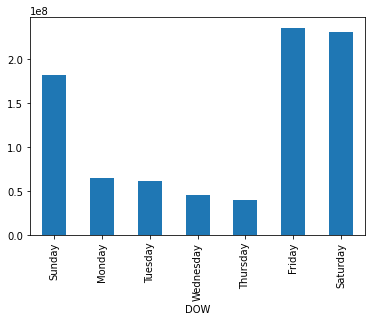

In [312]:
#Bar Graph
data_types_dict = {'Daily': int}
df22 = df
df22['Daily'] = df22['Daily'].apply(lambda x: (x.split()[0].replace('$', '')))
df22['Daily'] = df22['Daily'].apply(lambda x: (x.replace(',', '')))                              
df22 = df22.astype(data_types_dict)
dfo = df22.groupby('DOW')['Daily'].sum().reindex(["Sunday","Monday", "Tuesday", "Wednesday","Thursday","Friday","Saturday"])
dfo.plot(x='DOW', y='Daily', kind='bar')

#Explanation
'''As you can see from the bar graph below for the Avengers movie, a lot of business happens on Friday and Saturday, and after that, Sundays are good, and mid-level business continuing every day. '''

'Therefore, by looking at the pie graph below for the Avengers movie, we can see that it was quite popular in the months of April and May but steadily declining in popularity after that. '

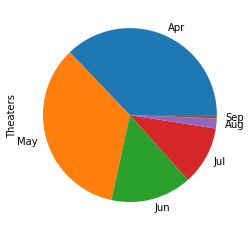

In [313]:
#Pie Chart
df23 = df
df23['Date'] = df23['Date'].apply(lambda x: (x[0:3]))                         
df23.groupby(['Date'])['Theaters'].mean().reindex(["Apr", "May", "Jun","Jul","Aug","Sep"]).plot(kind='pie', y='Theaters')
#Explanation
'''Therefore, by looking at the pie graph below for the Avengers movie, we can see that it was quite popular in the months of April and May but steadily declining in popularity after that. '''

"As a result, the below line graph for the Avengers movie shows that, although April and May's box office collections were very strong, the trend for next months dramatically declined."

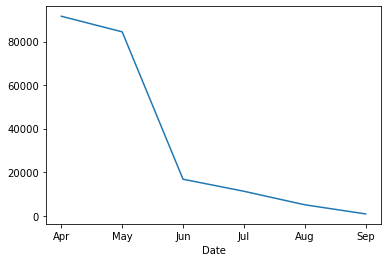

In [314]:
#Line Graph
df24 = df
data_types_dict = {'Avg': int}
df24['Date'] = df24['Date'].apply(lambda x: (x[0:3]))    
df24['Avg'] = df24['Avg'].apply(lambda x: (x.split()[0].replace('$', '')))
df24['Avg'] = df24['Avg'].apply(lambda x: (x.replace(',', '')))                              
df24 = df24.astype(data_types_dict)
df24['month'] = pd.DatetimeIndex(pd.to_datetime(df['Date'], format='%b')).month
df24 = df24.set_index('month').sort_index()
fdf = df24.groupby(['Date'])['Avg'].sum().reindex(["Apr", "May", "Jun","Jul","Aug","Sep"])
fdf.plot(x=' ', y='Avg', kind='line')

#Explanation
'''As a result, the below line graph for the Avengers movie shows that, although April and May's box office collections were very strong, the trend for next months dramatically declined.'''